<a href="https://colab.research.google.com/github/CamilaaRodriguezz/Laboratorio-1-procesamiento-de-se-ales-/blob/main/lab_1_procesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

laboratorio 1 Analisis estadistico de la señal

In [17]:
#Descarga de librerias
!pip install wfdb
!pip install numpy matplotlib scipy pandas

In [2]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


PARTE A

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
record = wfdb.rdrecord('/content/drive/MyDrive/Colab Notebooks/121001_ECG')

signal = record.p_signal[:,0]


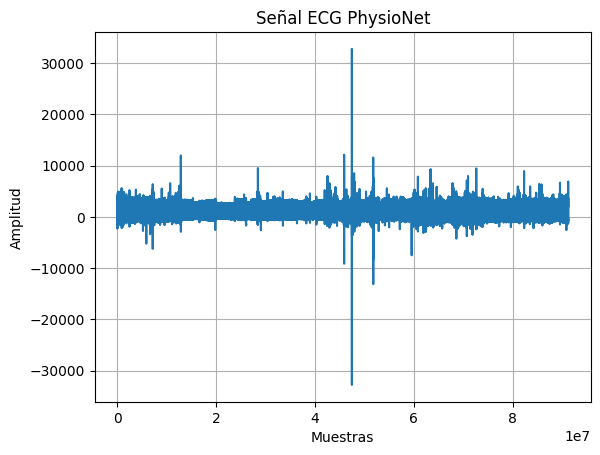

In [5]:
plt.figure()
plt.plot(signal)
plt.title("Señal ECG PhysioNet")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


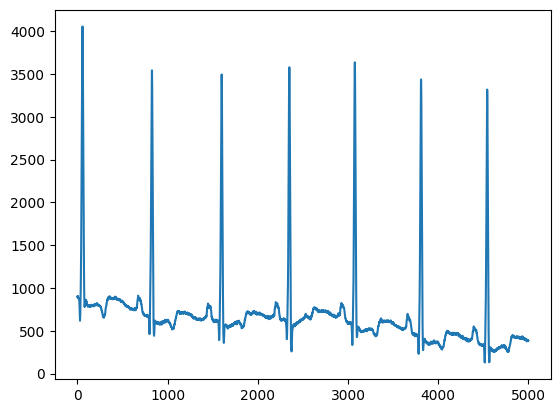

In [6]:
señal=signal[1000:6000]
plt.plot(señal)

In [7]:

# Número de datos
N = len(señal)

# 1. MEDIA
media = sum(señal) / N

# 2. DESVIACIÓN ESTÁNDAR
suma_var = 0
for x in señal:
    suma_var += (x - media)**2

varianza = suma_var / N
desv_std = np.sqrt(varianza)

# 3. COEFICIENTE DE VARIACIÓN
cv = desv_std / media

# 4. ASIMETRÍA (SKEWNESS)
suma_skew = 0
for x in señal:
    suma_skew += (x - media)**3

skewness = (suma_skew / N) / (desv_std**3)

# 5. CURTOSIS
suma_kurt = 0
for x in señal:
    suma_kurt += (x - media)**4

kurt = (suma_kurt / N) / (desv_std**4)

# RESULTADOS
print(" ESTADÍSTICOS (DESDE CERO) ")
print("Media:", media)
print("Desviación estándar:", desv_std)
print("Coeficiente de variación:", cv)
print("Asimetría:", skewness)
print("Curtosis:", kurt)


 ESTADÍSTICOS (DESDE CERO) 
Media: 670.3188063761287
Desviación estándar: 433.45801352572204
Coeficiente de variación: 0.6466445658433466
Asimetría: 4.599967444200471
Curtosis: 27.920486734959482


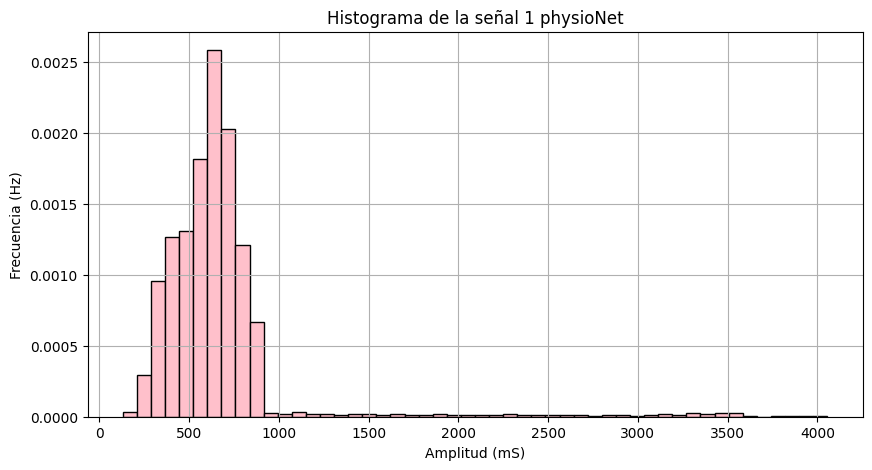

In [8]:
plt.figure(figsize=(10,5))
plt.hist(señal, bins=50, color='pink', edgecolor='black', density=True)
plt.title("Histograma de la señal 1 physioNet")
plt.xlabel("Amplitud (mS)")
plt.ylabel("Frecuencia (Hz)")
plt.grid(True)
plt.show()

PARTE B

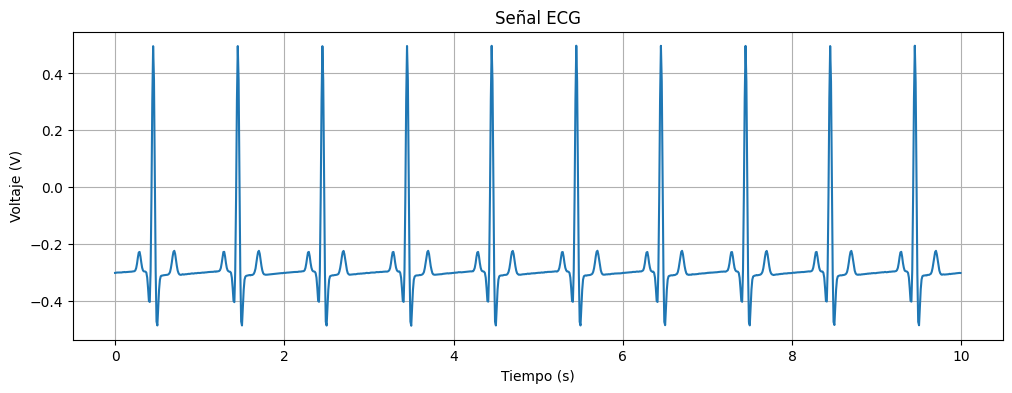

In [9]:

# Cargar archivo:
datos = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/senal_ecg.txt', delimiter='\t', skiprows=1)

# Separar columnas
t = datos[:, 0]
senal = datos[:, 1]

# Calcular frecuencia de muestreo automáticamente
fs = 1 / (t[1] - t[0])

# Graficar
plt.figure(figsize=(12,4))
plt.plot(t, senal)
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.title("Señal ECG")
plt.grid()
plt.show()

In [10]:
N = len(senal)

# 1. Media
media = sum(senal) / N

# 2. Desviación estándar
suma_var = 0
for x in senal:
    suma_var += (x - media)**2

varianza = suma_var / N
desv_std = np.sqrt(varianza)

# 3. Coeficiente de variación
cv = desv_std / media if media != 0 else 0

# 4. Asimetría
suma_skew = 0
for x in senal:
    suma_skew += (x - media)**3

skew_manual = (suma_skew / N) / (desv_std**3)

# 5. Curtosis
suma_kurt = 0
for x in senal:
    suma_kurt += (x - media)**4

kurt_manual = (suma_kurt / N) / (desv_std**4)

print("=== MÉTODO MANUAL ===")
print("Media:", media)
print("Desviación estándar:", desv_std)
print("Coeficiente de variación:", cv)
print("Asimetría:", skew_manual)
print("Curtosis:", kurt_manual)


=== MÉTODO MANUAL ===
Media: -0.2755946689535922
Desviación estándar: 0.13148674086055573
Coeficiente de variación: -0.4771019024417231
Asimetría: 4.174142421525527
Curtosis: 22.28656812149953


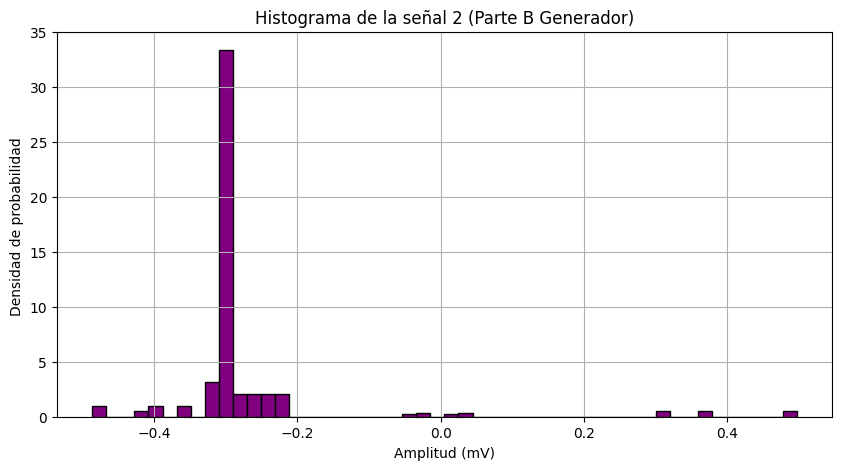

In [11]:
plt.figure(figsize=(10,5))
plt.hist(senal, bins=50, color='purple', edgecolor='black', density=True)
plt.title("Histograma de la señal 2 (Parte B Generador)")
plt.xlabel("Amplitud (mV)")
plt.ylabel("Densidad de probabilidad ")
plt.grid(True)
plt.show()

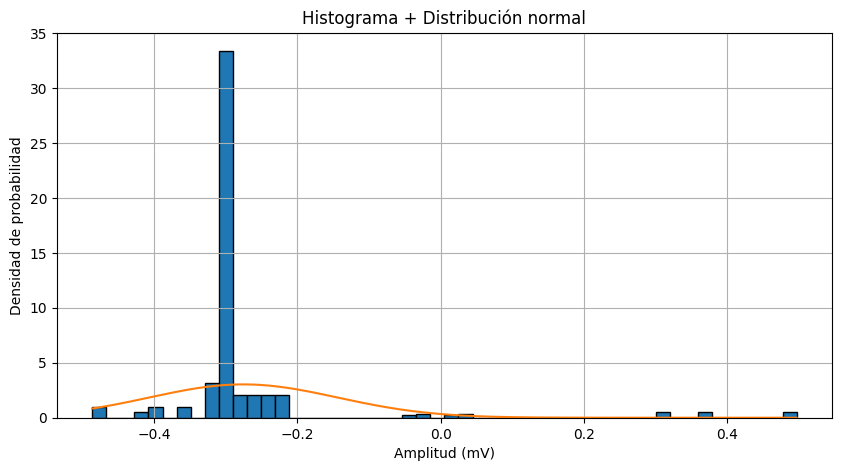

In [12]:
x = np.linspace(min(senal), max(senal), 1000)
pdf = (1/(desv_std*np.sqrt(2*np.pi))) * np.exp(-(x-media)**2/(2*desv_std**2))

plt.figure(figsize=(10,5))
plt.hist(senal, bins=50, density=True, edgecolor='black')
plt.plot(x, pdf)
plt.title("Histograma + Distribución normal")
plt.xlabel("Amplitud (mV)")
plt.ylabel("Densidad de probabilidad")
plt.grid()
plt.show()

PARTE C

In [18]:
def calcular_snr(senal_original, senal_ruido):
    ruido = senal_ruido - senal_original
    potencia_senal = np.mean(senal_original**2)
    potencia_ruido = np.mean(ruido**2)
    snr = 10 * np.log10(potencia_senal / potencia_ruido)
    return snr

SNR con ruido gaussiano: 9.483493409250972 dB


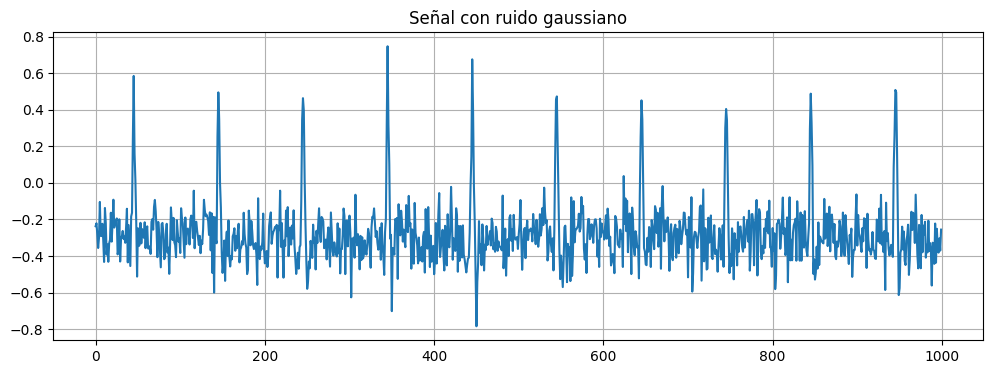

In [14]:
# Generar ruido gaussiano
ruido_gauss = np.random.normal(0, 0.1, len(senal))

# Señal contaminada
senal_gauss = senal + ruido_gauss

# Calcular SNR
snr_gauss = calcular_snr(senal, senal_gauss)

print("SNR con ruido gaussiano:", snr_gauss, "dB")

# Graficar
plt.figure(figsize=(12,4))
plt.plot(senal_gauss)
plt.title("Señal con ruido gaussiano")
plt.grid()
plt.show()

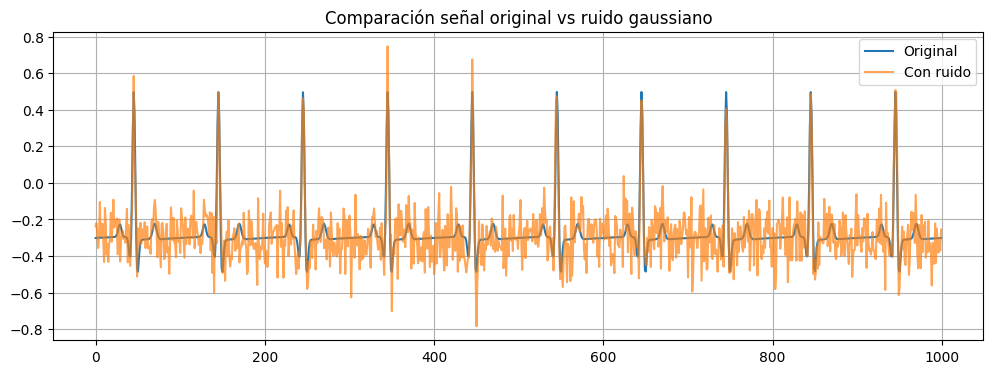

In [19]:
plt.figure(figsize=(12,4))
plt.plot(senal, label="Original")
plt.plot(senal_gauss, alpha=0.7, label="Con ruido")
plt.legend()
plt.title("Comparación señal original vs ruido gaussiano")
plt.grid()
plt.show()

SNR con ruido impulso: 0.15365272915878503 dB


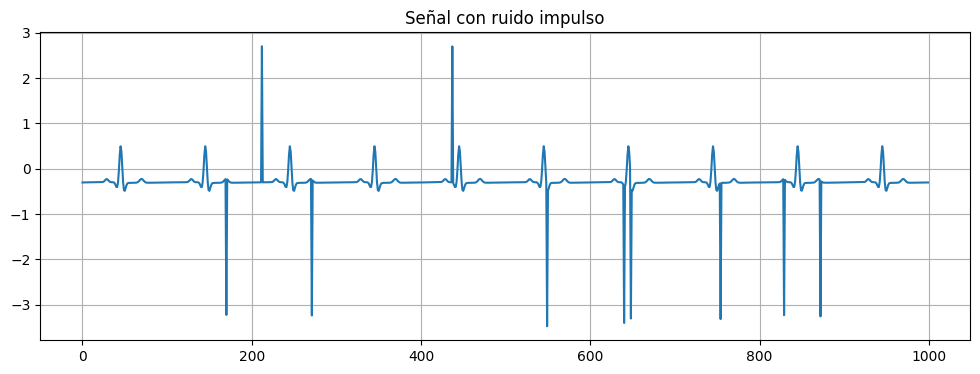

In [15]:
senal_impulso = senal.copy()

# Crear impulsos aleatorios
num_impulsos = int(0.01 * len(senal))  # 1% de la señal
indices = np.random.randint(0, len(senal), num_impulsos)

senal_impulso[indices] += np.random.choice([3, -3], size=num_impulsos)

# SNR
snr_impulso = calcular_snr(senal, senal_impulso)

print("SNR con ruido impulso:", snr_impulso, "dB")

# Graficar
plt.figure(figsize=(12,4))
plt.plot(senal_impulso)
plt.title("Señal con ruido impulso")
plt.grid()
plt.show()

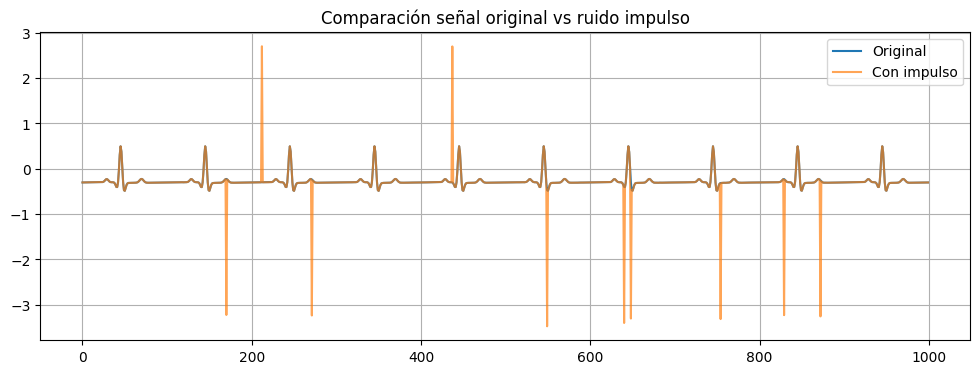

In [20]:
plt.figure(figsize=(12,4))
plt.plot(senal, label="Original")
plt.plot(senal_impulso, alpha=0.7, label="Con impulso")
plt.legend()
plt.title("Comparación señal original vs ruido impulso")
plt.grid()
plt.show()

SNR con ruido artefacto: -1.0687714480082486 dB


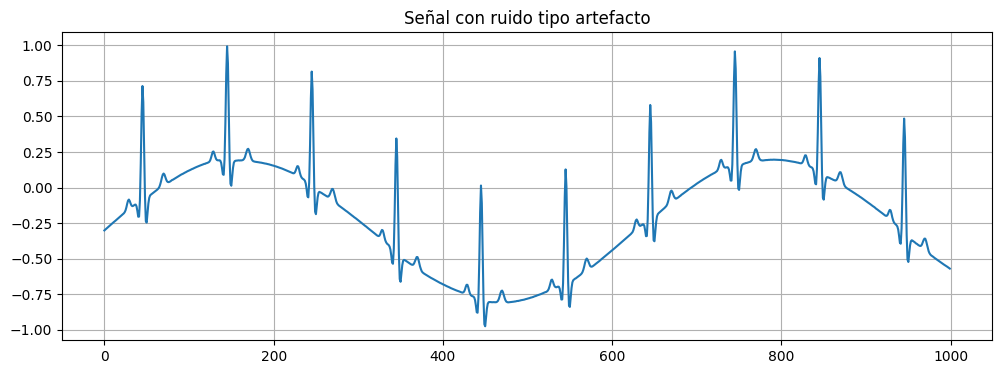

In [16]:
t = np.arange(len(senal))

# Ruido tipo artefacto (baja frecuencia)
ruido_artefacto = 0.5 * np.sin(0.01 * t)

senal_artefacto = senal + ruido_artefacto

# SNR
snr_artefacto = calcular_snr(senal, senal_artefacto)

print("SNR con ruido artefacto:", snr_artefacto, "dB")

# Graficar
plt.figure(figsize=(12,4))
plt.plot(senal_artefacto)
plt.title("Señal con ruido tipo artefacto")
plt.grid()
plt.show()

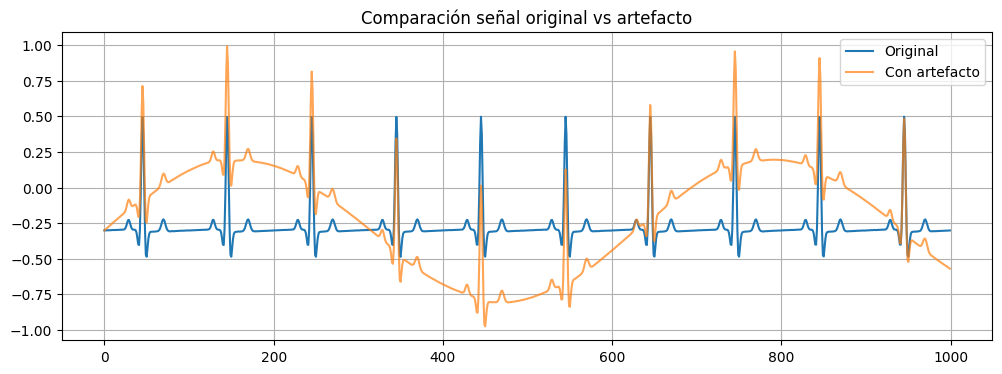

In [21]:
plt.figure(figsize=(12,4))
plt.plot(senal, label="Original")
plt.plot(senal_artefacto, alpha=0.7, label="Con artefacto")
plt.legend()
plt.title("Comparación señal original vs artefacto")
plt.grid()
plt.show()